In [1]:
import pickle
import numpy as np
from pathlib import Path

ae_dir = Path('models/11_03')
vade_dir = Path('models/vade_11_24')

In [5]:
with open(ae_dir/'labels_dict.pkl', 'rb') as file:
    ae_labels = pickle.load(file)

with open(vade_dir/'labels_dict.pkl', 'rb') as file:
    vade_labels = pickle.load(file)
    
files = list(ae_labels.keys())
ae_labels = np.concatenate([ae_labels[f] for f in files])
vade_labels = np.concatenate([vade_labels[f] for f in files])

In [8]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_mutual_info_score, adjusted_rand_score

print(normalized_mutual_info_score(ae_labels, vade_labels))
print(adjusted_mutual_info_score(ae_labels, vade_labels))
print(adjusted_rand_score(ae_labels, vade_labels))

0.12853195573331017
0.12845293248717832
0.023693490449411242


In [10]:
from collections import Counter
def entropy(labels):
    counter = Counter(labels)
    value_counts = np.array(list(counter.values()))
    probs = value_counts / value_counts.sum()
    return - (probs * np.log(probs)).sum()


In [16]:
entropy(ae_labels), entropy(vade_labels)

(2.939960179823589, 2.1652969190866402)

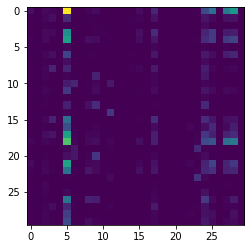

In [9]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

plt.imshow(confusion_matrix(ae_labels, vade_labels))